# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Load Dataset

In [0]:
# LOAD THE IRIS DATASET

from sklearn.datasets import load_iris

dataset = load_iris() 

data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
                        #Load dataset as a dataframe with all feature variables
data['species'] = pd.Categorical.from_codes(dataset.target, dataset.target_names)
                        #Concatentate target variable in the dataframe
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


[Dataset Loading SKLearn Documentation] https://scikit-learn.org/stable/datasets/index.html

# Visualize the dataset by a ScatterPlot

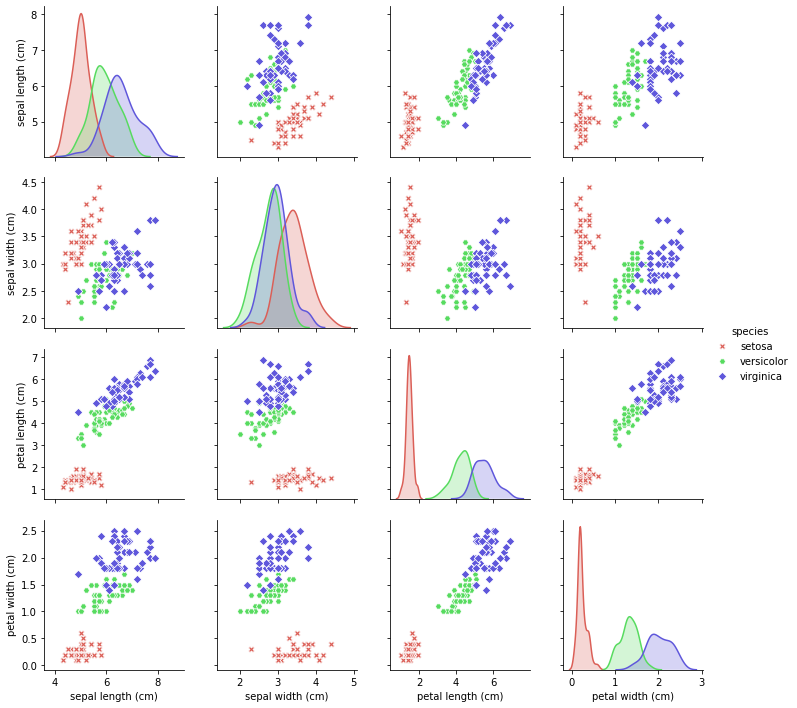

In [0]:
# SCATTER PLOT OF THE IRIS DATASET 

pairplot = sns.pairplot(data, hue = "species", palette="hls", markers=["X", "H", "D"])

[Pairplot Seaborn Dcoumentation] https://seaborn.pydata.org/generated/seaborn.scatterplot.html

[Blog] https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 <br> https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0


[Dev Community] https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame

INTERPRETATION OF SEPERABILITY OF THE 3 CLASSES IN IRIS DATASET:

1. The species 'Setosa' is self-contained (not overlapping with the other species) in almost all the scatter plots.
2. The species 'Versicolor' and 'Virginica' are almost adjacent in the plots of Petal Length vs all features and Petal Width vs all features.
3. These two species overlap to some extent in the scatter plots in the plots of Sepal Length and Width vs all features, with a major overlap in the plot of Sepal Length vs Sepal Width. 
4. These observations signify that Setosa is fairly convenient for the classifiers to predict, whereas the other classes may prove a bit difficult to predict, especially in terms of Sepal Length vs Sepal Width.
5. The plots placed diagonally in the figure above demonstrate the univariate distribution of the each (colored) species in terms of the numeric value of their features. 
6. The plots are in the form of density plots which make it easier for us to compare the distributions between the various features of the dataset.
7. Also, it is worthwhile to note that the scatter plots on the either side of the diagonal plots are mirror plots of eachother, with the axes swapped. This gives us a different visualization of the same features, thus enriching our analysis.

# Split the dataset for Training, Validation and Testing

In [0]:

# SPLIT THE DATASET INTO TRAINING, VALIDATION AND TESTING

X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['species']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                            #Divide dataset into training + validation and testing
    
X_train, X_val, y_train, y_val  = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
                            #Divide dataset into training and validation

[Dataset Splitting SKLearn Documentation] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[Blog] https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

# Classification Algorithms:

## 1. K-Nearest Neighbors Classifier

In [0]:

## K NEAREST NEIGHBORS CLASSIFIER WITH DEFAULT PARAMETERS

knn_clf1 = KNeighborsClassifier()        
                #Using KNN Classifier from Sci-Kit Learn Library with default parameters

knn_model1 = knn_clf1.fit(X_train, y_train)     
                #Fit the KNN model with training data
knn_preds1 = knn_model1.predict(X_test)

knn_acc1 = knn_model1.score(X_test, y_test) * 100
                #Calculate accuracy on Test data

print('The Accuracy of the KNN model on test data is', knn_acc1  ,'%')

# print('The Accuracy of the KNN model on test data is:' , accuracy_score(y_test, knn_preds1)*100 , '%')

The Accuracy of the KNN model on test data is 96.66666666666667 %


[SKLearn Documentation] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html <br> 

[Background Reads] https://scikit-learn.org/stable/modules/neighbors.html <br>

[Blogs] https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a <br>
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn<br>


The accuracies for different values of k are:  [90.0, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 96.66666666666667, 96.66666666666667, 93.33333333333333]


Text(0.5, 1.0, 'K- Nearest Neighbors Classifier ')

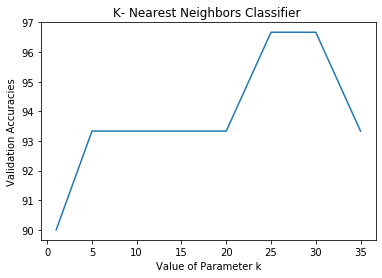

In [0]:

# FINDING THE BEST PARAMETERS OF KNN CLASSIFIER AND TESTING ON VALIDATION DATA

k = [1, 5, 10, 15, 20, 25, 30, 35]        # NO. OF NEIGHBORS

KNN_arr = list()

for i in range(len(k)):
    knn_clf2 = KNeighborsClassifier(n_neighbors = k[i])
                    #Using KNN Classifier from Sci-Kit Learn Library with a range of parameters

    knn_model2 = knn_clf2.fit(X_train, y_train) 
                    #Fit the KNN model with training data

#     knn_preds2 = knn_clf2.predict(X_val)
    knn_acc2 = knn_model2.score(X_val, y_val) * 100
                    #Calculate accuracy on Validation data

    KNN_arr.append(knn_acc2)
                    #Append accuracy score in a list
    
print('The accuracies for different values of k are: ', KNN_arr)
    
# Plotting the accuracies for all values of k     
plt.plot(k , KNN_arr)
plt.xlabel('Value of Parameter k')
plt.ylabel('Validation Accuracies')
plt.title('K- Nearest Neighbors Classifier ')

[Plotting in Python] https://matplotlib.org/tutorials/introductory/pyplot.html<br>
https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/

[Matplotlib Documentation] https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py

Analysis and Interpretation:

1. By looking at the plot of Validation Accuracy Scores vs Value of parameter k, we can report that the we obtain best performance (96.67%) of our machine learning model with a value of k = 25 or 30.
2. K- Nearest Neighbors algorithm works on the principle of finding the 'k' nearest neighbors of a data sample and assigning a label to this datapoint depending on the majority class within this neighbors group. Hence, a sufficiently high (and odd) number of neighbors allow a fair voting for label assignment.
3. However, a very large value of k may force the algorithm to involve outliers (isolated datapoints) in the majority voting process, which is undesirable.
4. Also, we need to take into consideration that as we increase the number of neighbors, the time and computational complexity of the algorithm increases.
5. Thus, for maintaining high accuracy and lower computational complexity, we will choose a value of k = 25 as our best value of hyperparameter.



In [0]:
# Training a KNN model on Train data and testing on Test data using the best found value of parameter k

knn_clf_test = KNeighborsClassifier(n_neighbors = 25)
                #Using KNN Classifier from Sci-Kit Learn Library with selected parameters

knn_model_test = knn_clf_test.fit(X_train, y_train)
                #Fit the KNN model with training data

# knn_preds_test = knn_clf_test.predict(X_test)
knn_acc_test = knn_model_test.score(X_test, y_test)*100
                #Calculate accuracy on Test data


print('The Accuracy of the K-Nearest Neighbors model on TEST data with value of hyperparameter k = 25 is' , knn_acc_test, '%' )

# print('The Accuracy of the K-Nearest Neighbors model with value of hyperparameter k = 25 is is:' , accuracy_score(y_test, knn_preds_test)*100 , '%')

The Accuracy of the K-Nearest Neighbors model on TEST data with value of hyperparameter k = 25 is 100.0 %


In [0]:
# SPLIT THE DATASET INTO TRAINING AND TESTING

X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['species']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2. Support Vector Machine Classifier

Values of C:  [0.1, 0.5, 1, 2, 5, 10, 20, 50]
Mean Accuracy Scores: [0.9583333333333334, 0.9583333333333333, 0.9583333333333333, 0.9583333333333334, 0.9583333333333334, 0.95, 0.9333333333333332, 0.9333333333333332]


Text(0.5, 1.0, 'Support Vector Machine Classifier ')

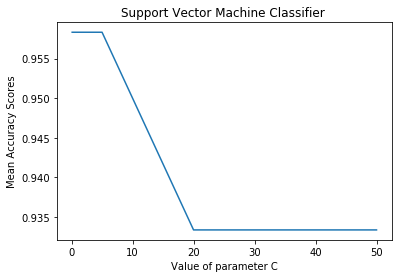

In [0]:

# FINDING THE BEST PARAMETERS OF SVM CLASSIFIER AND CROSS-VALIDATING ON TRAINING DATA

C = [ 0.1, 0.5, 1, 2, 5, 10, 20, 50]        #Given value for C

svm_acc = list()            #Create a list of accuracies

for i in range (len(C)):
    svm_clf = svm.SVC(kernel='linear', C=C[i], random_state = 42)     
                                                        #Using SVM Classifier from Sci-Kit Learn Library
    svm_scores = cross_val_score(svm_clf, X_train_val, y_train_val, cv=10)
                                                        #Apply Cross-validation on Training set
    svm_acc.append(svm_scores.mean())
                                                        #Append mean accuracy value in list

print("Values of C: " , C)
print("Mean Accuracy Scores:" , svm_acc)
    
# Plotting the accuracies for all values of C

plt.plot(C , svm_acc)
plt.xlabel('Value of parameter C')
plt.ylabel('Mean Accuracy Scores')
plt.title('Support Vector Machine Classifier ')

[SKLearn Documentation] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

[Background Read] https://scikit-learn.org/stable/modules/svm.html

[Blog] https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 <br> https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7


Analysis and Interpretation:

1. Support Vector Machines are very effective in high dimensional spaces, but as the number of training vectors increase, the computational requirements also increase. 

2. The model gives high accuracy of 95.83% for values of C ranging from 0.1 to 5

2. The parameter C is inversely proportional to the regularization parameter 'lambda', and higher the lambda, lesser the missclassifications. But with a very large lambda, there is a possibility of overfitting.

4. For maintaining high accuracy and generalizability of our model, we chose C = 0.5 (which translates to lambda = 2). This will provide us with high accuracy and also maintain generalizability in our model.

In [0]:

# Training the SVM model on Train+Validation data and testing on Test data using the best chosen value of parameter C

svm_clf_test = svm.SVC(kernel='linear', C=0.5, random_state = 42)
                #Using SVM Classifier from Sci-Kit Learn Library with selected parameters

svm_model_test = svm_clf_test.fit(X_train_val, y_train_val)
                #Fit the SVM model with training data

svm_acc_test = svm_clf_test.score(X_test, y_test)
                #Calculate accuracy on Test data

print('The Accuracy of the SVM model on test data with value of C = 0.5 is ', svm_acc_test*100, '%')


The Accuracy of the SVM model on test data with value of C = 0.5 is  100.0 %


In [0]:
# SPLIT THE DATASET INTO TRAINING AND TESTING

X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['species']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Decision Trees Classifier

Maximum Depth:  [3, 5, 10, None]
Mean Accuracy Scores: [0.9333333333333332, 0.9166666666666666, 0.9249999999999998, 0.9249999999999998]


Text(0.5, 1.0, 'Decision Trees Classifier ')

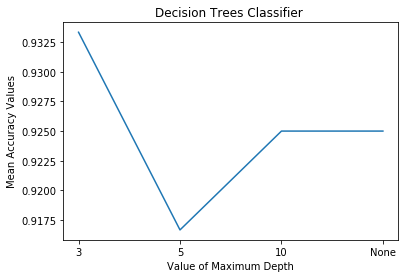

In [0]:

# DECISION TREES

depth = [3, 5, 10,  None]    #Maximum depth of Trees

dt_acc = []

for i in range (len(depth)):
    dt_clf = DecisionTreeClassifier(random_state = 42, max_depth = depth[i])    
                                                 #Using Decision trees Classifier from Sci-Kit Learn Library
    dt_scores = cross_val_score(dt_clf, X_train_val, y_train_val, cv=10)
                                                 #Apply Cross-validation on Training set
    dt_acc.append(dt_scores.mean())
                                                 #Append mean accuracy values in list

print("Maximum Depth: " , depth)
print("Mean Accuracy Scores:" , dt_acc)

# Convert depth array interger elements to string elements

tree_depth = []
for elem in depth:
    tree_depth.append(str(elem))

    
# Plotting the accuracies for all values of Maximum Depth

plt.plot(tree_depth , dt_acc)
plt.xlabel('Value of Maximum Depth')
plt.ylabel('Mean Accuracy Values')
plt.title('Decision Trees Classifier ')

[SKLearn Documentation] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[Blogs] https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3 <br> https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb 

Analysis and Interpretation:

1. In the above example, we get a maximum accuracy of 93.33% with a maximum tree depth of 3.

2. As the tree depth increases, we observe that the accuracy decreases, and the increase in tree depth has no effect on the performance of decision tree model.

3. Choosing a large value of max_depth is also not desirable as it would cause overfitting of our model. So we select max_depth = 3 as the best value and use it to test on TEST data.

In [0]:
# Calculate the accuracy on Test data

dt_clf_test = DecisionTreeClassifier(random_state = 42, max_depth = 3)
                                #Using DT Classifier from Sci-Kit Learn Library with selected parameters

dt_model_test = dt_clf_test.fit(X_train_val, y_train_val) 
                                #Fit the DT model with train+Validation data

dt_acc_test = dt_model_test.score(X_test, y_test) * 100
                                #Calculate accuracy on Test data

print('The Accuracy of the Decision Tree model on test data is', dt_acc_test, '%')


The Accuracy of the Decision Tree model on test data is 100.0 %


## 4. Random Forest Classifier

In [0]:

# RANDOM FOREST

nTrees = [5, 10, 50, 150, 200]         #Number of Trees
depth = [3, 5, 10, None]               #Maximum depth of Trees


rf_acc = np.ndarray(shape=(len(nTrees), len(depth)))     #Create a 2D array for accuracies

for i in range (len(nTrees)):
    for j in range (len(depth)):
        rf_clf = RandomForestClassifier(n_estimators= nTrees[i], random_state = 42, max_depth = depth[j])
                                            #Using Random Forest Classifier from Sci-Kit Learn Library
        rf_scores = cross_val_score(rf_clf, X_train_val, y_train_val, cv=10)
                                            #Apply cross-validation on train data
        rf_acc[i][j] = rf_scores.mean()
                                            #Compute mean values of cross validation accuracies
   
# Create a dataframe with appropriate index and column names
rf_acc_df = pd.DataFrame(rf_acc, index=['5', '10', '50', '150', '200'], columns=['3', '5', '10', 'None'])

# Print the dataframe
print("The distribution of accuracies with respect to depth and no. of trees is:")
rf_acc_df

The distribution of accuracies with respect to depth and no. of trees is:


,3,5,10,None
5,0.941667,0.941667,0.941667,0.941667
10,0.941667,0.925000,0.916667,0.916667
50,0.950000,0.933333,0.933333,0.933333
150,0.941667,0.925000,0.925000,0.925000
200,0.941667,0.933333,0.933333,0.933333


[sklearn Documentation] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[Seaborn Documentation] https://seaborn.pydata.org/generated/seaborn.heatmap.html

[Blogs] https://towardsdatascience.com/understanding-random-forest-58381e0602d2

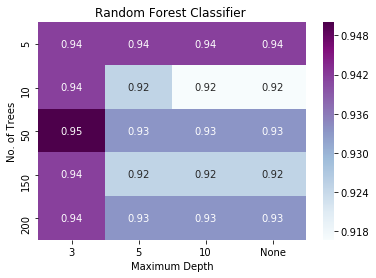

In [0]:

# RANDOM FOREST
# PLOTTING A HEATMAP

heatMap = sns.heatmap(rf_acc_df, annot = True, cmap="BuPu")

plt.title('Random Forest Classifier ')
plt.ylabel('No. of Trees')
plt.xlabel('Maximum Depth')
plt.show()

Analysis and Interpretation:

1. Random forest classification uses ensembling technique for making predictions. This ensembling involves combining predictions made by multiple decision trees and taking a majority vote.

2. In our above example, we obtain a maximum accuracy of 95% with 50 decision trees and the maximum depth of 3 of all trees.

3. The more the number of uncorrelated decision trees, the better chance of obtaining a better predictions from our model. 

4. Also, increasing the number of trees increases the algorithm complexity, and it doesn't affect the accuracy much. 

5. Hence, we will select a Number of trees = 50, with a maximum depth = 3 for calculating our test accuracy.

In [0]:
# Calculate the accuracy on Test data

rf_clf_test = RandomForestClassifier(n_estimators= 50, random_state = 42, max_depth = 3)
                                #Using RF Classifier from Sci-Kit Learn Library with selected parameters

rf_model_test = rf_clf_test.fit(X_train_val, y_train_val)
                                #Fit the RF model with train+Validation data

rf_acc_test = rf_model_test.score(X_test, y_test)
                                #Calculate accuracy on Test data

print('The Accuracy of the Random Forest model on test data is', rf_acc_test*100, '%')

The Accuracy of the Random Forest model on test data is 100.0 %


## 5. Gradient Boosting Classifier

No. of Estimators:  [5, 10, 50, 150, 200]
Mean Accuracy Scores: [0.9333333333333332, 0.9333333333333332, 0.9249999999999998, 0.9249999999999998, 0.9249999999999998]


Text(0.5, 1.0, 'Gradient Boosting Classifier ')

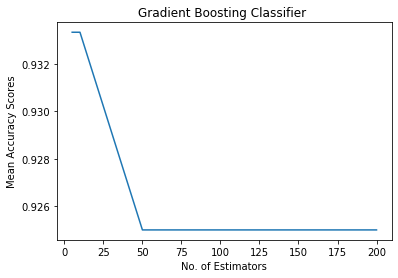

In [0]:

# GRADIENT BOOSTING CLASSIFIER

nTrees = [5, 10, 50, 150, 200]      # No. of Trees

gb_acc = list()

for i in range (len(nTrees)):
    gb_clf = GradientBoostingClassifier(random_state = 42, n_estimators = nTrees[i])
                                                #Using Gradient Boosting Classifier from Sci-Kit Learn Library

    gb_scores = cross_val_score(gb_clf, X_train_val, y_train_val, cv=10)
                                                #Applying cross-validtaion on training data
    gb_acc.append(gb_scores.mean())
                                                #Append mean values of cross-validtaion accuracies

print("No. of Estimators: " , nTrees)
print("Mean Accuracy Scores:" , gb_acc)
    
# PLOTTING 

plt.plot(nTrees , gb_acc)
plt.xlabel('No. of Estimators')
plt.ylabel('Mean Accuracy Scores')
plt.title('Gradient Boosting Classifier ')

[SKLearn Documentation] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

[Blogs] http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/gbm.html

In [0]:
# Calculate the accuracy on Test data

gb_clf_test = GradientBoostingClassifier(random_state = 42, n_estimators = 5)

gb_model_test = gb_clf_test.fit(X_train_val, y_train_val) 
gb_acc_test = gb_model_test.score(X_test, y_test) * 100

print('The Accuracy of the Gradient boosting model on test data is', gb_acc_test, '%')

The Accuracy of the Gradient boosting model on test data is 100.0 %
